In [2]:
!pip install quarto-cli

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00
  Created wheel for quarto-cli: filename=quarto_cli-1.6.42-py3-none-any.whl size=129963247 sha256=b69d882f15752bdd71fef6ddc92f0a61700862aaa3fc51307e101b9d4c63ab6d
  Stored in directory: /root/.cache/pip/wheels/08/53/61/bfcee646357ada471f314e1733d7306818bdd55d48ef8f830f
Successfully built quarto-cli
  Attempting 

In [22]:
!quarto render "/content/drive/MyDrive/Colab Notebooks/NewProject_2_quarto.qmd"


Starting python3 kernel...Done

Executing 'NewProject_2_quarto.quarto_ipynb'
  Cell 1/8: ''...Done
  Cell 2/8: ''...Done
  Cell 3/8: ''...Done
  Cell 4/8: ''...Done
  Cell 5/8: ''...Done
  Cell 6/8: ''...Done
  Cell 7/8: ''...Done
  Cell 8/8: ''...Done

pandoc 
  to: html
  output-file: NewProject_2_quarto.html
  standalone: true
  embed-resources: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: 'Unlocking Potential: A Global Journey Through Literacy'
  author: Amal Anil Kumar
  date: '2024-04-27'
  
Output created: NewProject_2_quarto.html



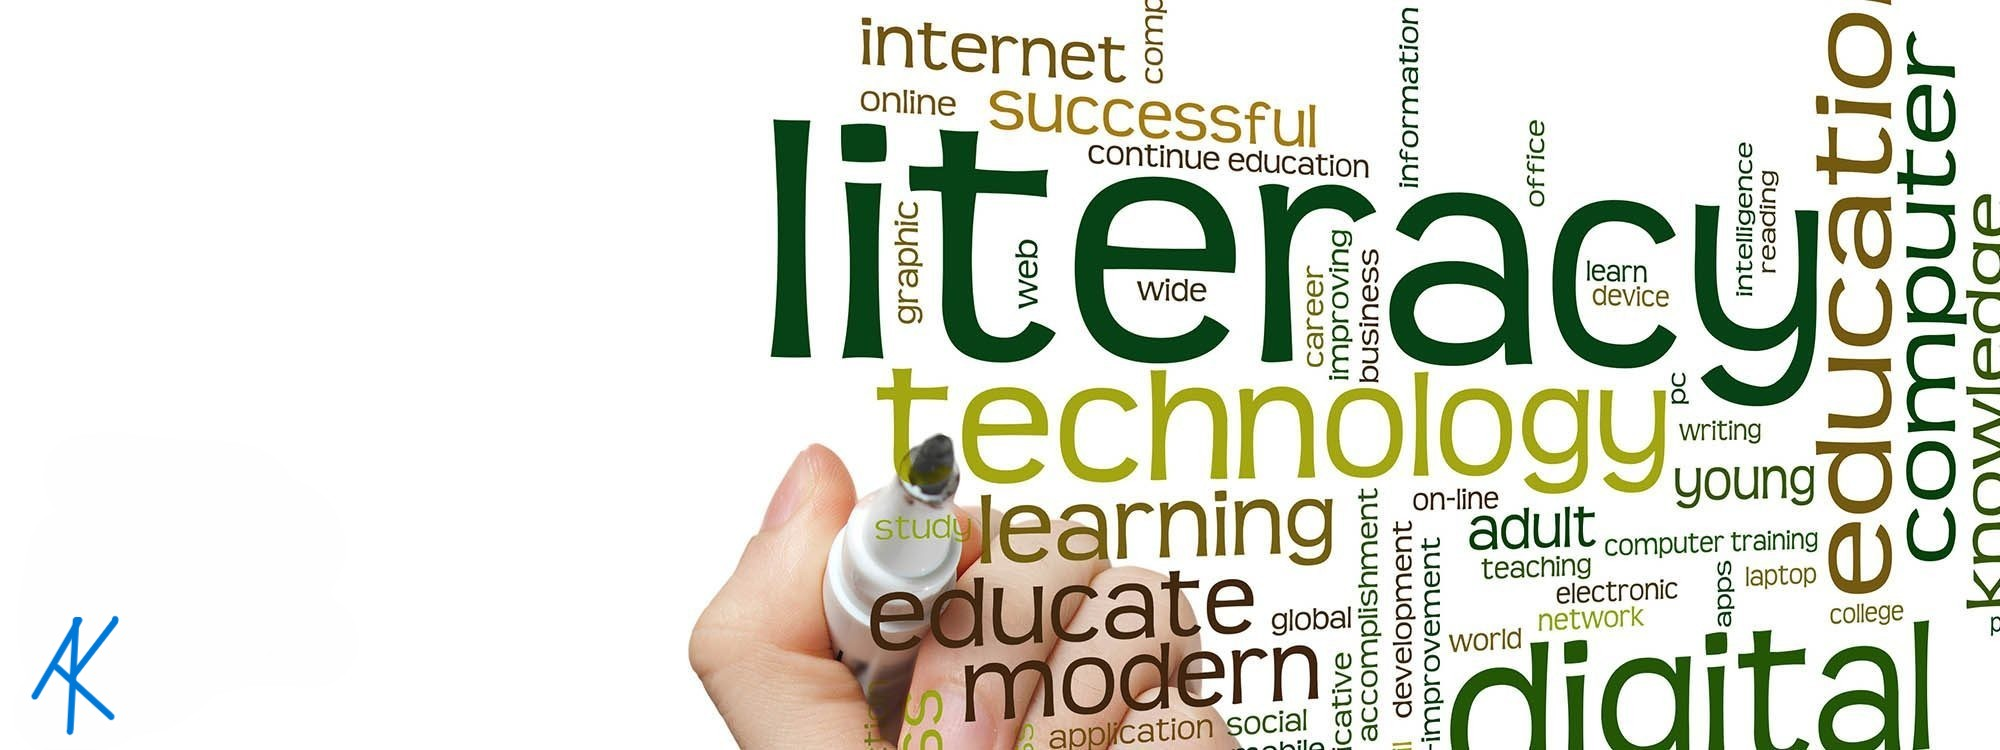

---
title: "**Unlocking Potential: A Global Journey Through Literacy**"
author: "Amal Anil Kumar"
date: "2024-04-26"
module: "Data Analytics & Story Telling"
format:
  html:
    embed-resources: true
    code-fold: true
---

**Introduction**

Literacy unlocks opportunities, empowers individuals, and propels societies forward. Yet, as of 2024, an estimated **763 million adults worldwide** still lack basic literacy skills, with women representing nearly two-thirds of this population (UNICEF, UNESCO). Sub-Saharan Africa and South Asia face the greatest challenges, where factors such as poverty, conflict, and limited access to education perpetuate generational cycles of low literacy. This project leverages recent UNICEF data to visualize these disparities, highlighting where progress has been made and where urgent attention is still needed. Our goal: to illuminate global patterns, foster understanding, and inspire data-driven solutions in the fight for universal literacy.
_______________________________________________________

In [12]:
import pandas as pd
import numpy as np
from plotnine import *
import geopandas as gp
import matplotlib.pyplot as plt

indicator1 = pd.read_csv('/content/Indicator1_Quarto.csv')
metadata = pd.read_csv('/content/Metadata_Quarto.csv')
literacydata = pd.read_csv('/content/LiteracyData_Quarto.csv')
estimate = pd.read_csv('/content/Literacy Estimation_Quarto.csv')

In [14]:
!pip install geopandas
shape_world = gp.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")

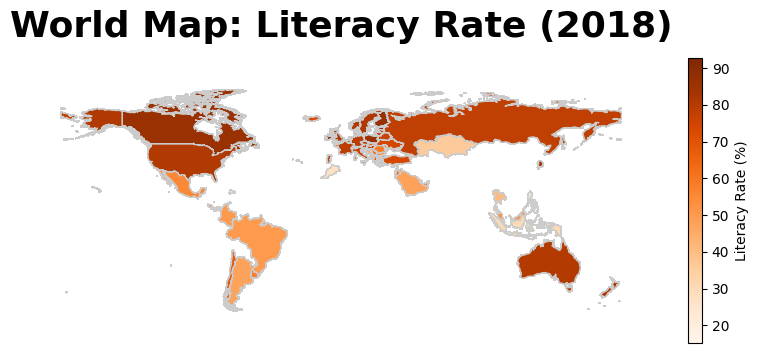

In [15]:
indicator1_2018 = indicator1[indicator1['time_period'] == 2018]
indicator1_2018 = indicator1_2018.rename(columns={'obs_value': 'Literacy Rate'})
indicator_meta = indicator1_2018.merge(metadata, how='left', on='country')

merged = shape_world.merge(indicator_meta, how='left', left_on='iso3', right_on='alpha_3_code_x')

indicator_meta = indicator_meta.rename(columns={'obs_value': 'Literacy Rate'})

import pandas as pd

indicator1 = pd.read_csv('/content/Indicator1_Quarto.csv')
metadata = pd.read_csv('/content/Metadata_Quarto.csv')
import geopandas as gp

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
merged.plot(
    column='Literacy Rate',
    cmap='Oranges',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'shrink': 0.5, 'label': 'Literacy Rate (%)'}
)
ax.set_title("World Map: Literacy Rate (2018)", fontsize=24, fontweight='bold', pad=30)
ax.set_axis_off()
plt.tight_layout()

**Global Patterns in Literacy Rates**

The map visualization clearly reveals a world divided by literacy opportunities. Regions such as Northern Europe, North America, and East Asia demonstrate near-universal literacy, reflecting decades of robust educational investment. However, more than half of adults in some Sub-Saharan African countries remain unable to read or write, contributing to the 763 million adults globally still without basic literacy skills (UNICEF, 2024). The stark contrast across regions highlights not just an educational gap, but a pressing call to action for international support and targeted policy interventions.
_______________________________________________________

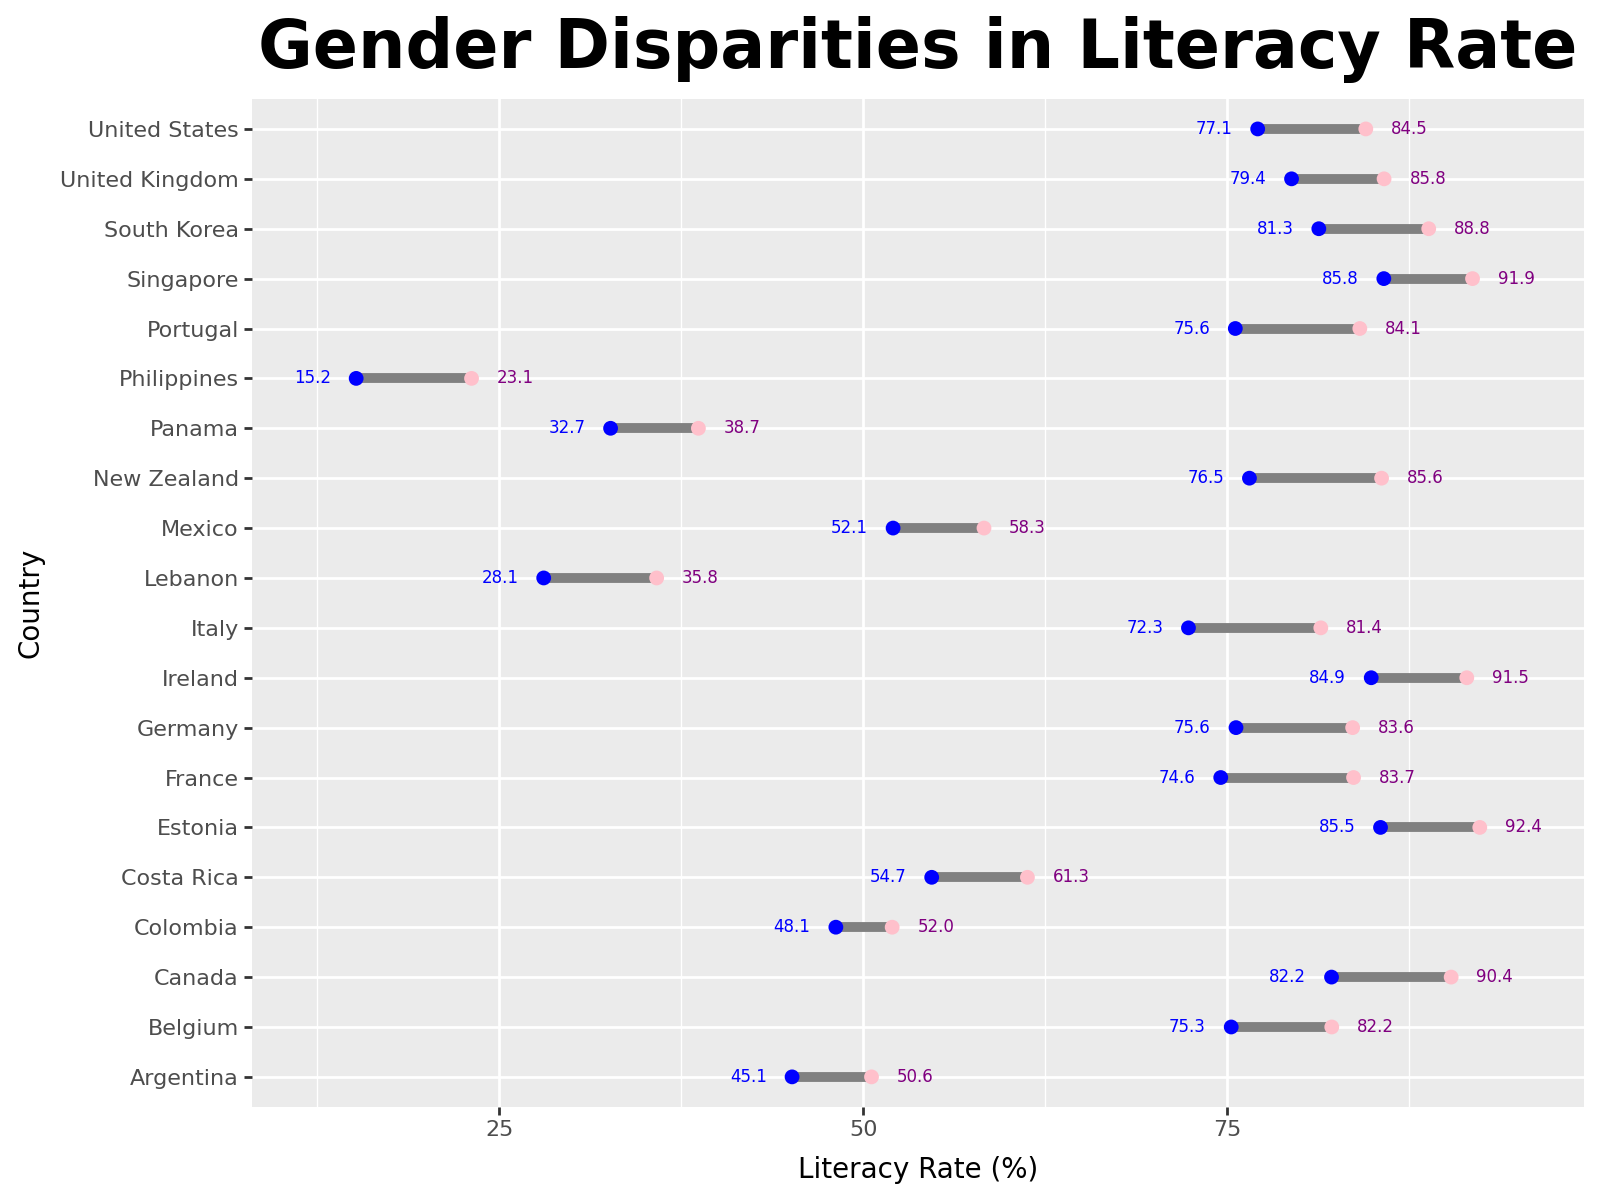

In [10]:
df_2018 = indicator1[indicator1['time_period'] == 2018][['country', 'obs_value', 'sex']]
df_pivot = df_2018.pivot(index='country', columns='sex', values='obs_value').reset_index()
df_pivot['Gap'] = df_pivot['Male'] - df_pivot['Female']
df_pivot = df_pivot.dropna()
gap_df_plot = df_pivot.sort_values('Gap', ascending=False).head(20)
gap_df_plot['Male_label'] = gap_df_plot['Male'].round(1).astype(str)
gap_df_plot['Female_label'] = gap_df_plot['Female'].round(1).astype(str)

(
    ggplot(gap_df_plot, aes(y='country'))
    + geom_segment(aes(x='Female', xend='Male', yend='country'), color='gray', size=2)
    + geom_point(aes(x='Male'), color='blue', size=2)
    + geom_point(aes(x='Female'), color='pink', size=2)
    + geom_text(aes(x='Male', label='Male_label'), nudge_x=-3, size=6, va='center', color='blue', show_legend=False)
    + geom_text(aes(x='Female', label='Female_label'), nudge_x=3, size=6, va='center', color='purple', show_legend=False)
    + labs(
        title='Gender Disparities in Literacy Rate',
        x='Literacy Rate (%)',
        y='Country'
    )
    + theme(
        figure_size=(8, 6),
        axis_text_x=element_text(size=8),
        axis_text_y=element_text(size=8),
        axis_title_x=element_text(size=10),
        axis_title_y=element_text(size=10),
        legend_text=element_text(size=8),
        legend_title=element_text(size=9),
        plot_title=element_text(size=24, weight='bold')
        )
)

#**Country-Level Gender Gaps in Literacy**

The lollipop chart above visualizes the gender disparity in literacy rates across 20 countries. For each country, the blue dot marks the male literacy rate and the pink dot marks the female rate, with the line between them showing the size of the gender gap. In countries such as Singapore, Estonia, and Ireland, both genders enjoy high and closely matched literacy rates, reflecting strong educational equity. However, in places like the Philippines, Panama, and Lebanon, noticeable gaps persist, with females trailing males. This chart, when viewed alongside the world maps, highlights that while global progress is being made, targeted action is still needed in specific countries to ensure girls and women are not left behind in the drive for universal literacy.
_______________________________________________________

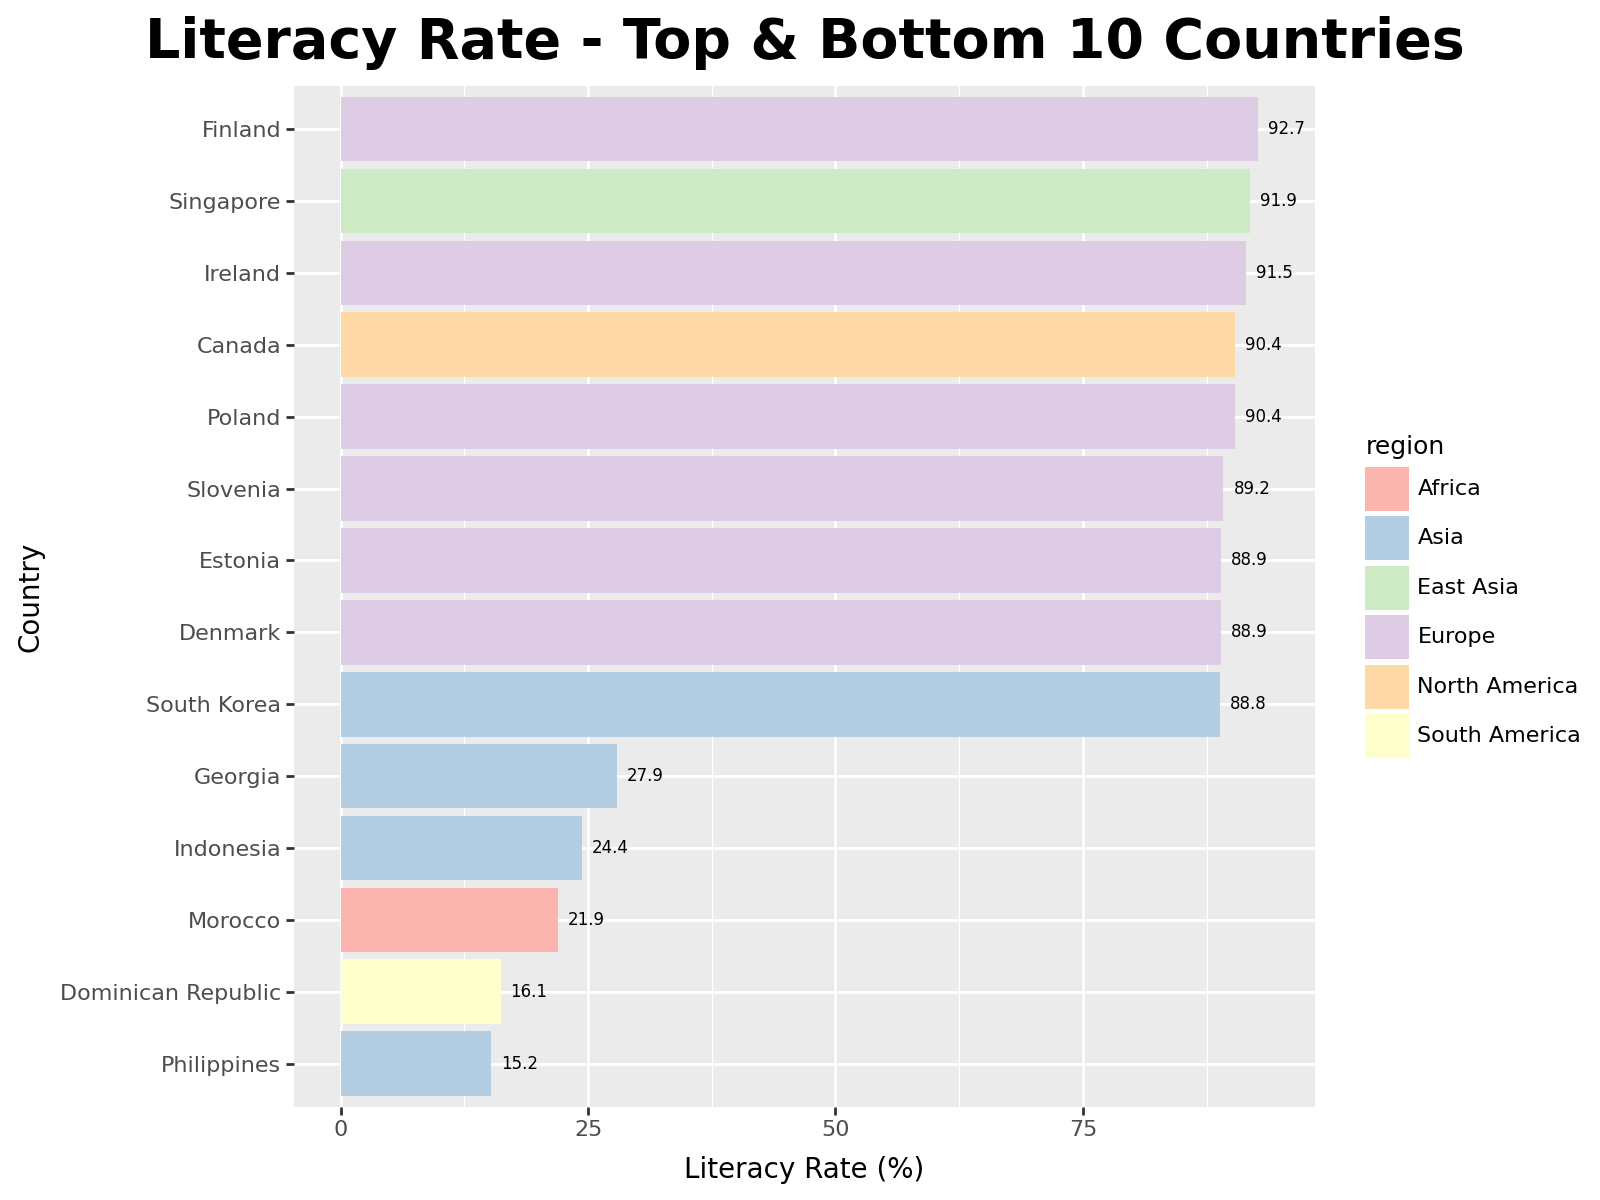

In [16]:
data_2018 = indicator_meta[indicator_meta['year'] == 2018]
top10_2018 = data_2018.nlargest(10, 'Literacy Rate')
bottom10_2018 = data_2018.nsmallest(10, 'Literacy Rate')
bar_data_2018 = pd.concat([top10_2018, bottom10_2018])
bar_data_2018 = bar_data_2018.sort_values('Literacy Rate')

# Get top and bottom 10
top10 = indicator_meta.nlargest(10, 'Literacy Rate')
bottom10 = indicator_meta.nsmallest(10, 'Literacy Rate')
bar_data = pd.concat([top10, bottom10])
bar_data_2018 = bar_data_2018.drop_duplicates(subset=['country'])
bar_data_2018 = bar_data_2018.sort_values('Literacy Rate')
bar_data_2018.loc[bar_data_2018['country'] == 'Singapore', 'region'] = 'East Asia'
bar_data_2018['country'] = pd.Categorical(bar_data_2018['country'], categories=bar_data_2018['country'], ordered=True)

from plotnine import *

(
    ggplot(bar_data_2018, aes(x='country', y='Literacy Rate', fill='region'))
    + geom_bar(stat='identity')
    + geom_text(
        aes(label=round(bar_data_2018['Literacy Rate'], 1)),
        ha='left', va='center',
        nudge_y=1,
        size=6
    )
    + coord_flip()
    + labs(
        title='Literacy Rate - Top & Bottom 10 Countries',
        x='Country',
        y='Literacy Rate (%)'
    )
    + scale_fill_brewer(type='qual', palette='Pastel1')
    + theme(
        figure_size=(8, 6),
        axis_text_x=element_text(size=8),
        axis_text_y=element_text(size=8),
        axis_title_x=element_text(size=10),
        axis_title_y=element_text(size=10),
        legend_text=element_text(size=8),
        legend_title=element_text(size=9),
        plot_title=element_text(size=20, weight='bold')
        )
)

#**Spotlighting Literacy Leaders and Laggards**

The bar chart above highlights the dramatic divide in global literacy rates. In 2018, countries such as Estonia, Poland, Singapore achieved near-universal literacy, a testament to robust education systems and sustained investment in schooling. Conversely, nations like Niger, Chad, South Sudan remain at the bottom, with literacy rates as low as 3% a sobering reflection of ongoing challenges including poverty, conflict, and lack of access to quality education.

According to UNICEF, global youth literacy has climbed to 89%, yet over 60 million children of primary school age are still unable to read or write. The lowest literacy rates are found in Sub-Saharan Africa and parts of South Asia, where gender disparities persist: in some countries, less than one in four young women are literate. These gaps not only limit individual opportunity but also hold back entire communities and economies. Bridging them requires targeted investment, inclusive policies, and international cooperation.

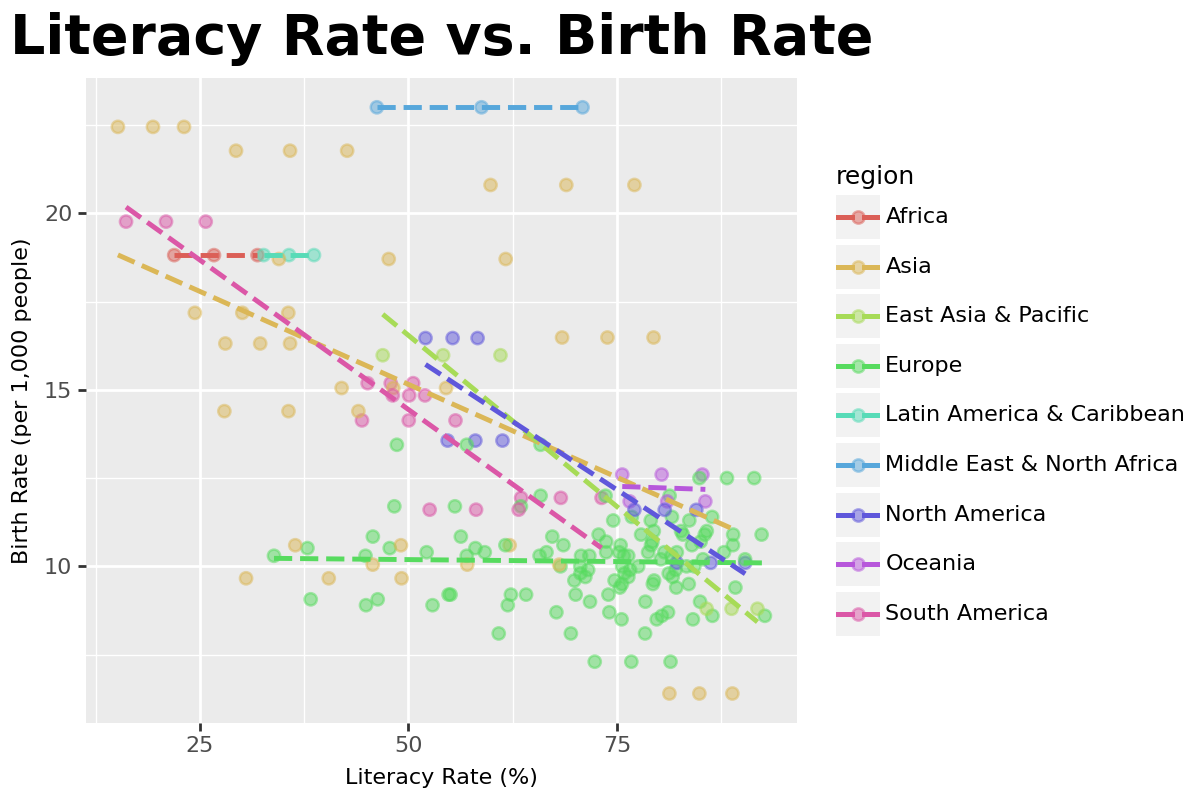

In [17]:
# Filter 2018 data for both literacy and metadata
literacy_2018 = indicator_meta[indicator_meta['year'] == 2018]
metadata_2018 = metadata[metadata['year'] == 2018]

# Merge on 'country' to get literacy rate and birth rate together
scatter_data = pd.merge(
    literacy_2018,
    metadata_2018[['country', 'Birth rate, crude (per 1,000 people)']],
    on='country',
    how='inner'
)
scatter_data = scatter_data.rename(columns={'Birth rate, crude (per 1,000 people)_x': 'BirthRate'})
scatter_data.loc[scatter_data['country'] == 'Cuba', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Guatemala', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Honduras', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Jordan', 'region'] = 'Middle East & North Africa'
scatter_data.loc[scatter_data['country'] == 'Kyrgyzstan', 'region'] = 'Europe & Central Asia'
scatter_data.loc[scatter_data['country'] == 'Malaysia', 'region'] = 'East Asia & Pacific'
scatter_data.loc[scatter_data['country'] == 'Panama', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Singapore', 'region'] = 'East Asia & Pacific'

from plotnine import *

(
    ggplot(scatter_data, aes(x='Literacy Rate', y='BirthRate', color='region'))
    + geom_point(size=2, alpha=0.5)
    + geom_smooth(method='lm', se=False, linetype='dashed')
    + labs(
        title='Literacy Rate vs. Birth Rate',
        x='Literacy Rate (%)',
        y='Birth Rate (per 1,000 people)'
    )
    + theme(figure_size=(6, 4),
        axis_text_x=element_text(size=8),
        axis_text_y=element_text(size=8),
        axis_title_x=element_text(size=8),
        axis_title_y=element_text(size=8),
        legend_text=element_text(size=8),
        legend_title=element_text(size=9),
        plot_title=element_text(size=20, weight='bold')
        )
)

#**Education and Population Growth: The Link Revealed**

The scatter plot above reveals a strong inverse relationship between literacy rates and birth rates among countries in 2018. Nations with high literacy, such as Japan and other developed Asian countries, consistently report lower birth rates. In contrast, countries with lower literacy, especially in parts of Sub-Saharan Africa, have birth rates more than double the global average. This trend underscores the transformative role of education, particularly for girls and women, in shaping demographic outcomes and advancing sustainable development.

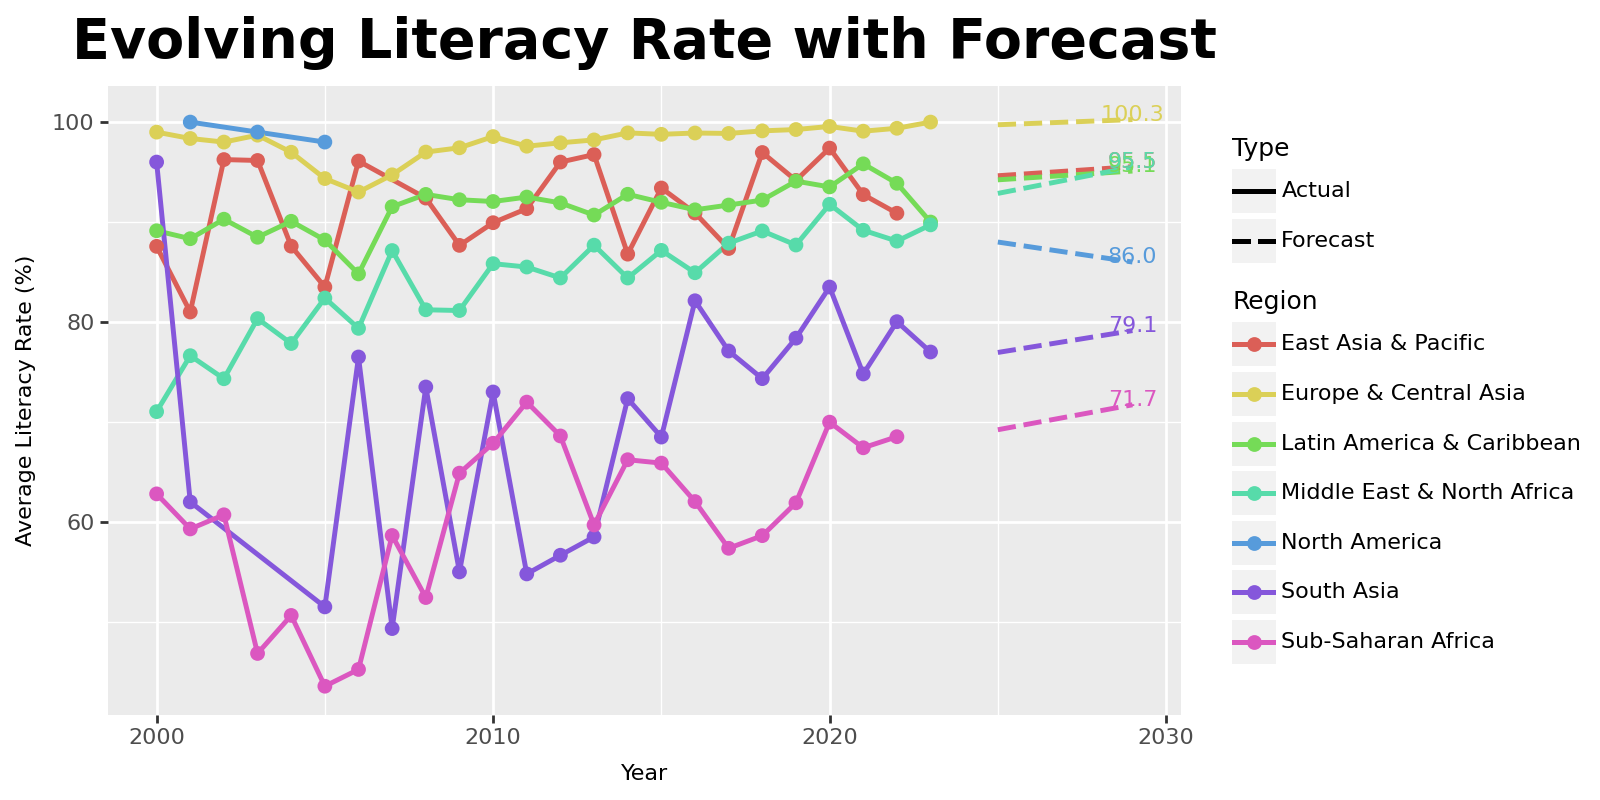

In [20]:
literacydata = pd.read_csv('/content/LiteracyData_Quarto.csv')
literacydata = literacydata.rename(columns={
    'Entity': 'Country',
    'Code': 'CountryCode',
    'Year': 'Year',
    'Literacy rate': 'LiteracyRate',
    'Region': 'Region'
})
literacy_recent = literacydata[literacydata['Year'] >= 2000]
region_ts = (
    literacy_recent.groupby(['Region', 'Year'], as_index=False)
    .agg({'LiteracyRate': 'mean'})
)

from sklearn.linear_model import LinearRegression
import numpy as np

forecast_frames = []

# Loop over each region
for region in region_ts['Region'].unique():
    data = region_ts[region_ts['Region'] == region].copy()
    X = data['Year'].values.reshape(-1, 1)
    y = data['LiteracyRate'].values

    model = LinearRegression()
    model.fit(X, y)

    # Predict for next 5 years
    future_years = np.arange(2025, 2030)
    future_preds = model.predict(future_years.reshape(-1, 1))

    # Build forecast DataFrame
    forecast_df = pd.DataFrame({
        'Region': region,
        'Year': future_years,
        'LiteracyRate': future_preds
    })

    forecast_frames.append(forecast_df)

forecast_all = pd.concat(forecast_frames)

# Combine original and forecasted data
region_ts['Type'] = 'Actual'
forecast_all['Type'] = 'Forecast'
region_full = pd.concat([region_ts, forecast_all])
labels_2029 = region_full[(region_full['Year'] == 2029) & (region_full['Type'] == 'Forecast')].copy()
labels_2029['label'] = labels_2029['LiteracyRate'].round(1).astype(str)
from plotnine import *

(
    ggplot(region_full, aes(x='Year', y='LiteracyRate', color='Region', linetype='Type'))
    + geom_line(size=1)
    + geom_point(data=region_full[region_full['Type'] == 'Actual'], size=2)
    + geom_text(
        data=labels_2029,
        mapping=aes(label='label'),
        nudge_y=0.5,
        size=8,
        show_legend=False
    )
    + labs(
        title='Evolving Literacy Rate with Forecast',
        x='Year',
        y='Average Literacy Rate (%)'
    )
    + scale_linetype_manual(values={'Actual': 'solid', 'Forecast': 'dashed'})
    + theme(figure_size=(8, 4),
        axis_text_x=element_text(size=8),
        axis_text_y=element_text(size=8),
        axis_title_x=element_text(size=8),
        axis_title_y=element_text(size=8),
        legend_text=element_text(size=8),
        legend_title=element_text(size=9),
        plot_title=element_text(size=20, weight='bold')
        )
)

#**Forecasting Regional Literacy: Progress, Plateaus, and Surprises**
The chart shows that Europe & Central Asia will maintain the highest literacy rates through 2029, while East Asia & Pacific and Latin America & Caribbean continue steady gains, nearing 95%. North America, unusually, displays a declining trend that may reflect unique regional challenges. In contrast, Sub-Saharan Africa and South Asia, despite some improvement, are forecasted to lag behind—highlighting persistent educational disparities that require urgent attention.
_______________________________________________________

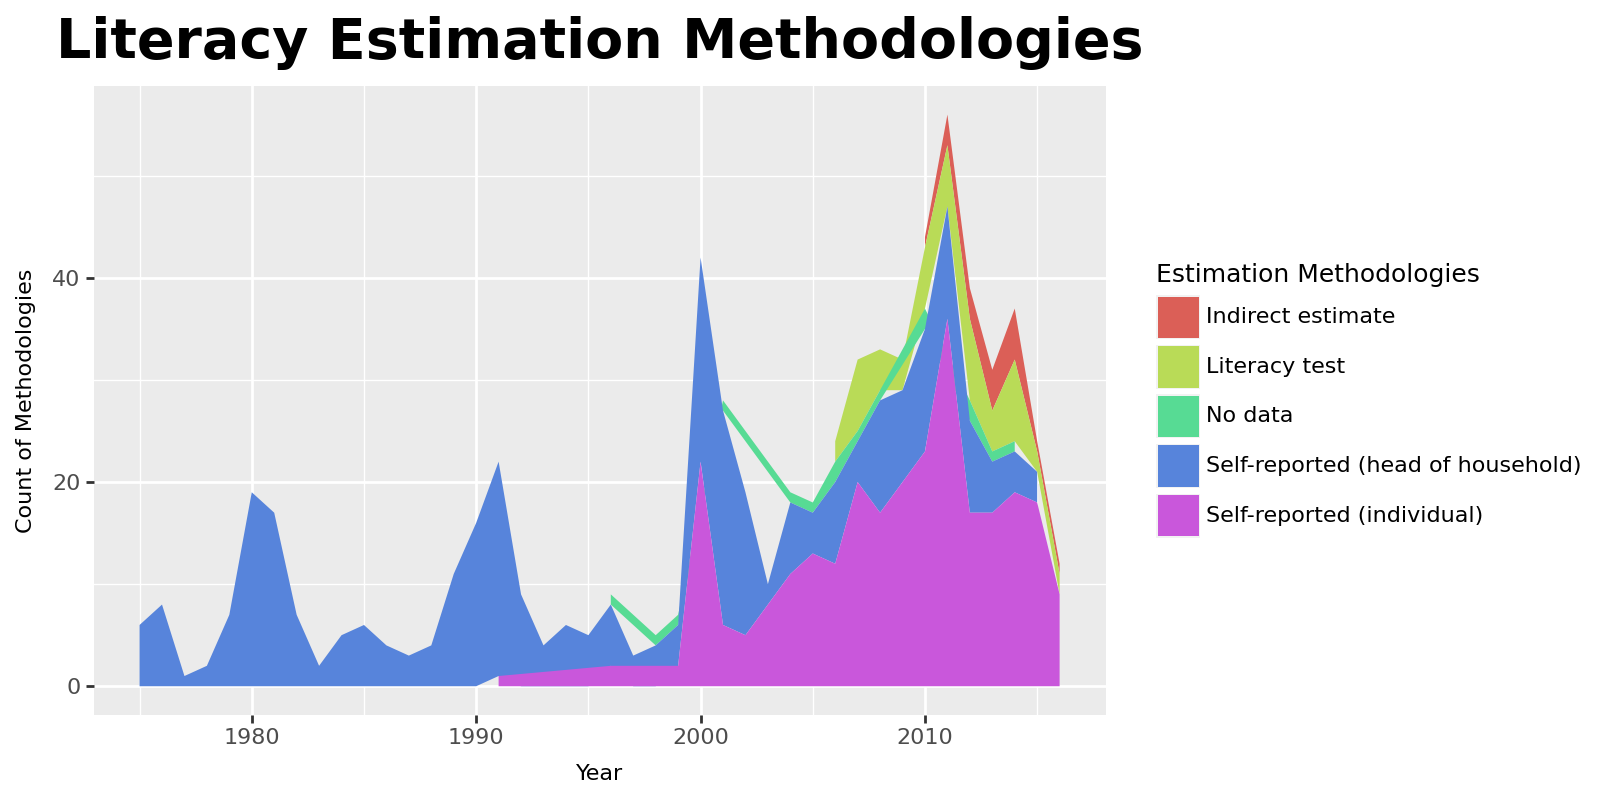

In [21]:
estimate = estimate.rename(columns={'Methodologies used for measuring literacy (UIS (2017))': 'Method'})
method_counts = (
    estimate.groupby(['Year', 'Method'], as_index=False)
    .size()
    .rename(columns={'size': 'Count'})
)

(
    ggplot(method_counts, aes(x='Year', y='Count', fill='Method'))
    + geom_area(position='stack')
    + labs(
        title='Literacy Estimation Methodologies',
        x='Year',
        y='Count of Methodologies',
        fill='Estimation Methodologies'
    )
    + theme(figure_size=(8, 4),
        axis_text_x=element_text(size=8),
        axis_text_y=element_text(size=8),
        axis_title_x=element_text(size=8),
        axis_title_y=element_text(size=8),
        legend_text=element_text(size=8),
        legend_title=element_text(size=9),
        plot_title=element_text(size=20, weight='bold')
        )
)

#**Insight from the Literacy Estimation Methodology Chart**
The stacked area chart reveals how countries’ approaches to measuring literacy have evolved over time. Initially, most nations relied on self-reported methods, especially head-of-household surveys. However, there has been a marked increase in the use of individual self-reports and, to a lesser extent, direct literacy tests and indirect estimates in recent years. This shift suggests an encouraging move towards more accurate, standardized, and objective measurement of literacy. The chart also highlights periods where data collection methods were inconsistent or lacking (“No data”), underscoring the ongoing challenge of ensuring reliable and comparable global literacy statistics.
_______________________________________________________

#**Conclusion**
The evolution of literacy estimation methodologies, as depicted in the stacked area chart, shows a gradual but meaningful shift from broad, often less precise head-of-household reporting to more rigorous individual assessments and direct tests. Despite this progress in measurement, global literacy remains uneven. World and regional maps reveal steady overall gains, but also stark contrasts between regions—particularly in Sub-Saharan Africa and South Asia, where average rates and gender parity continue to lag. The lollipop chart emphasizes that even within high-performing countries, notable gender disparities persist, with girls and women disproportionately disadvantaged in several contexts. These findings underscore that, while global literacy is on an upward trend, reliable data, targeted resources, and gender-focused interventions are essential for closing the remaining gaps.

#**Recommendations:**

1. Expand the use of standardized, direct literacy assessments in at least 90% of countries within three years.

2. Halve the gender literacy gap in countries with more than a 5-point difference by implementing targeted, measurable programs for girls.

3. Prioritize funding and resources for literacy initiatives in Sub-Saharan Africa and South Asia, focusing especially on marginalized communities.

4. Require all countries to publicly report their literacy measurement methodology and move toward international best practices by 2025.

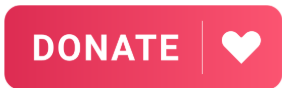

[**Donate for the cause**](https://www.unicef.ie/donate/#1)